# Titanic Kaggle Challenge

### 1. Exploratory Data Analysis

In [1]:
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pylab as plot

In [2]:
data=pd.read_csv("train.csv")

In [3]:
data.shape

(891, 12)

In [4]:
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


#### Checking missing values in each variable

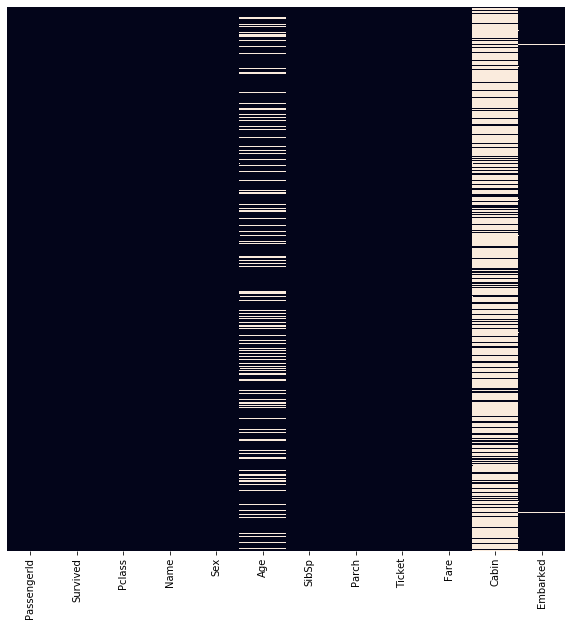

In [5]:
plt.figure(figsize=(10,10))
sns.heatmap(data.isnull(), yticklabels=False, cbar=False)

###### Some observations
1. There are total of 891 passengers in our training set.<br>
2. The age feature is missing approximately 20% of its values.<br> 
3. Cabin feature has most of its value missing.<br>
4. Embarkes feature is missing small amount of its values.<br>

In [6]:
# Check for any other unusable values
pd.isnull(data).sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
data['Age']=data['Age'].fillna(data['Age'].median())

In [8]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Data Visualization

##### Gender - Survival

In [9]:
data['Died'] = 1-data['Survived']

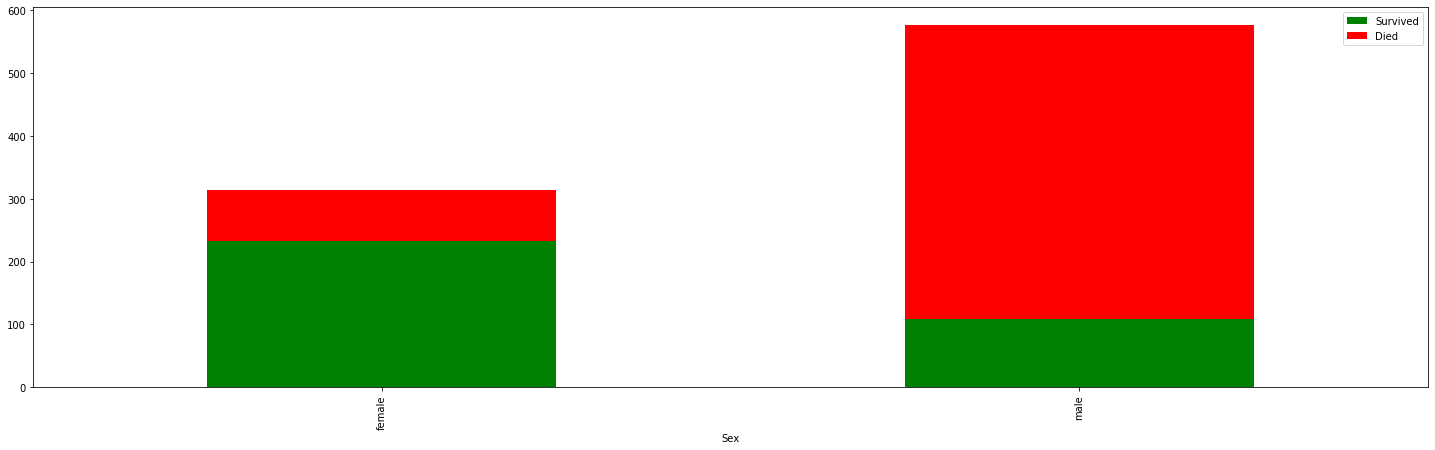

In [10]:
data.groupby('Sex').agg('sum')[['Survived','Died']].plot(kind='bar',figsize=(25, 7), stacked = True, colors=['g','r']);

From the above plot we can see female passengers a more likely to survive

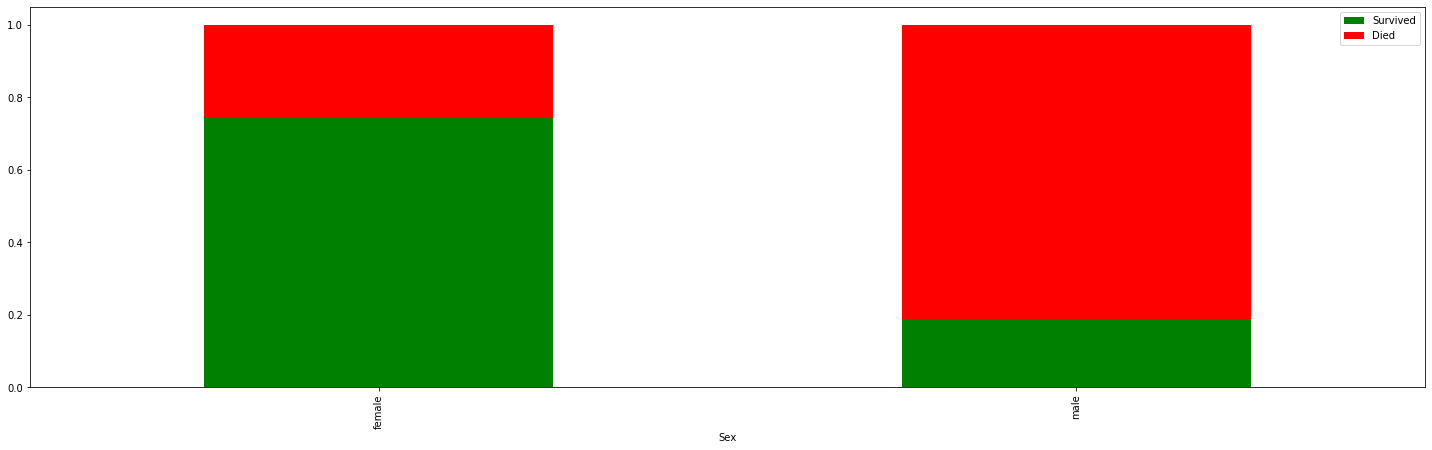

In [11]:
data.groupby('Sex').agg('mean')[['Survived','Died']].plot(kind='bar', figsize=(25, 7), stacked=True, colors=['g','r']);

##### Age - Survival

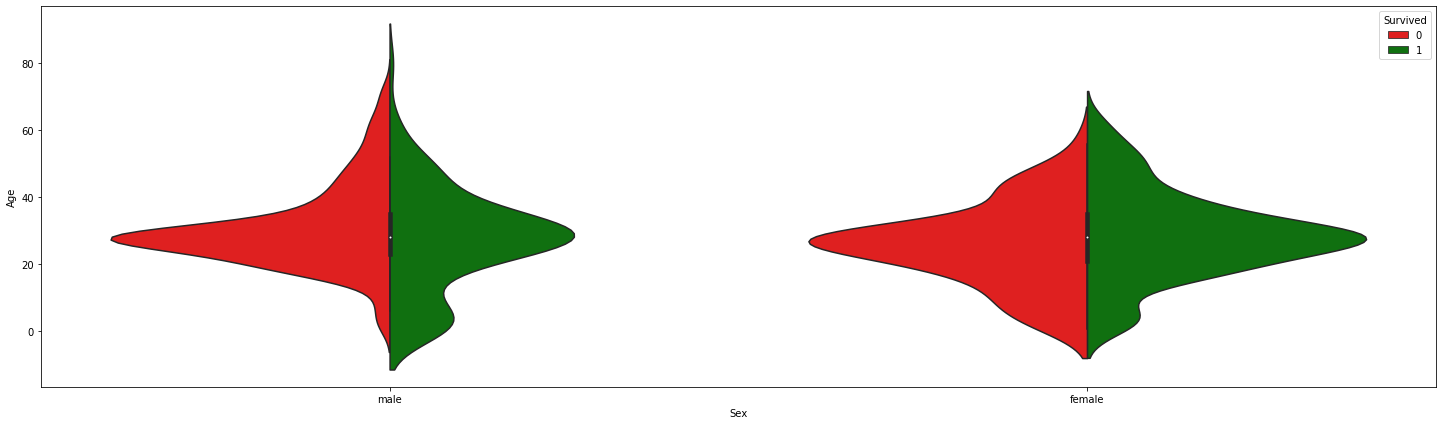

In [12]:
figure = plt.figure(figsize=(25,7))
sns.violinplot(x='Sex', y='Age', hue='Survived', 
               data=data, 
               split=True, palette={0: 'r', 1:'g'});

Younger male tend to survive<br>
The age doesn't seems to have a direct impact on the female survival

##### Fare - Survival

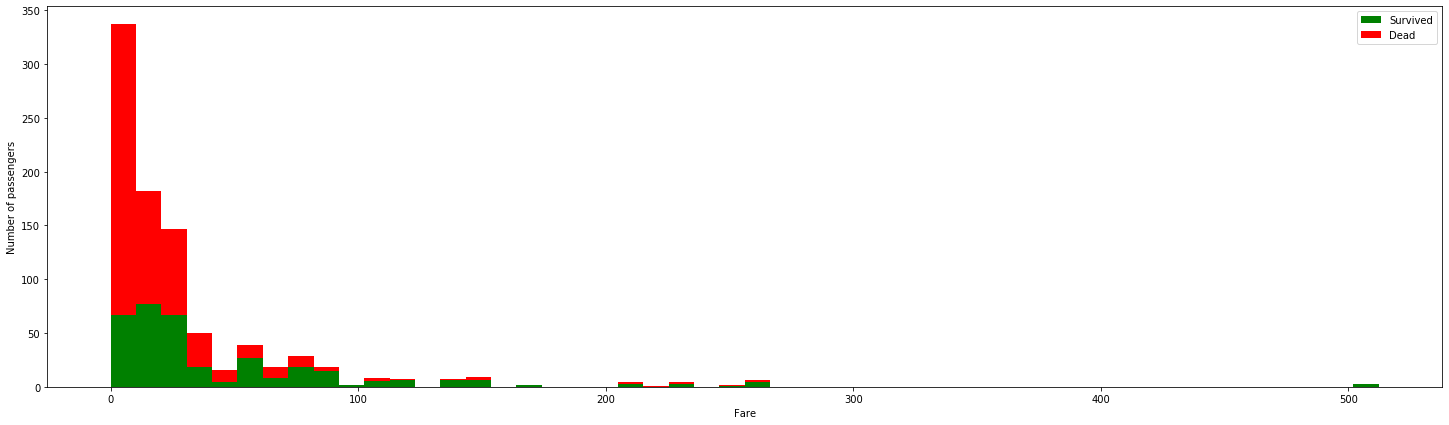

In [13]:
figure = plt.figure(figsize=(25,7))
plt.hist([data[data['Survived']==1]['Fare'],
          data[data['Survived']==0]['Fare']],
            stacked=True, color=['g','r'],
            bins=50, label=['Survived','Dead'])
plt.xlabel('Fare')
plt.ylabel('Number of passengers')
plt.legend();

Passenger with more expensive ticket are more likely to survive

##### Age - Fare - Survival

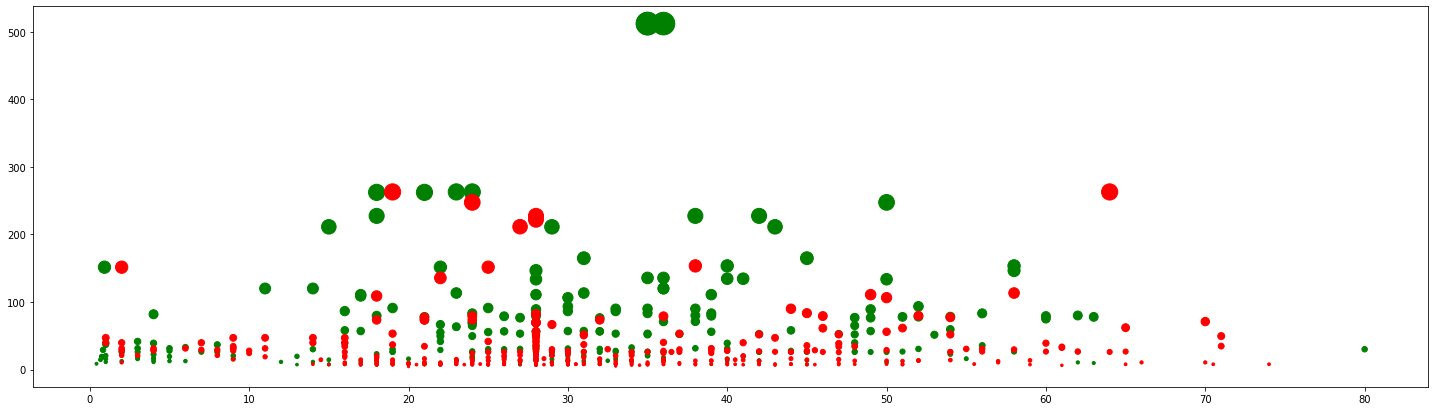

In [14]:
plt.figure(figsize=(25,7))
ax=plt.subplot()

ax.scatter(data[data['Survived']==1]['Age'],
          data[data['Survived']==1]['Fare'],
          c='green', s=data[data['Survived']==1]['Fare']);

ax.scatter(data[data['Survived']==0]['Age'],
          data[data['Survived']==0]['Fare'],
          c='red', s=data[data['Survived']==0]['Fare']);

The size of the circles is proportional to the ticket fare.

On the x-axis, we have the ages and the y-axis, we consider the ticket fare.

We can observe different clusters:<br>

1. Large green dots between x=20 and x=45: adults with the largest ticket fares<br>
2. Small red dots between x=10 and x=45, adults from lower classes on the boat<br>
3. Small greed dots between x=0 and x=7: these are the children that were saved<br>

As a matter of fact, the ticket fare correlates with the class as we see it in the chart below.

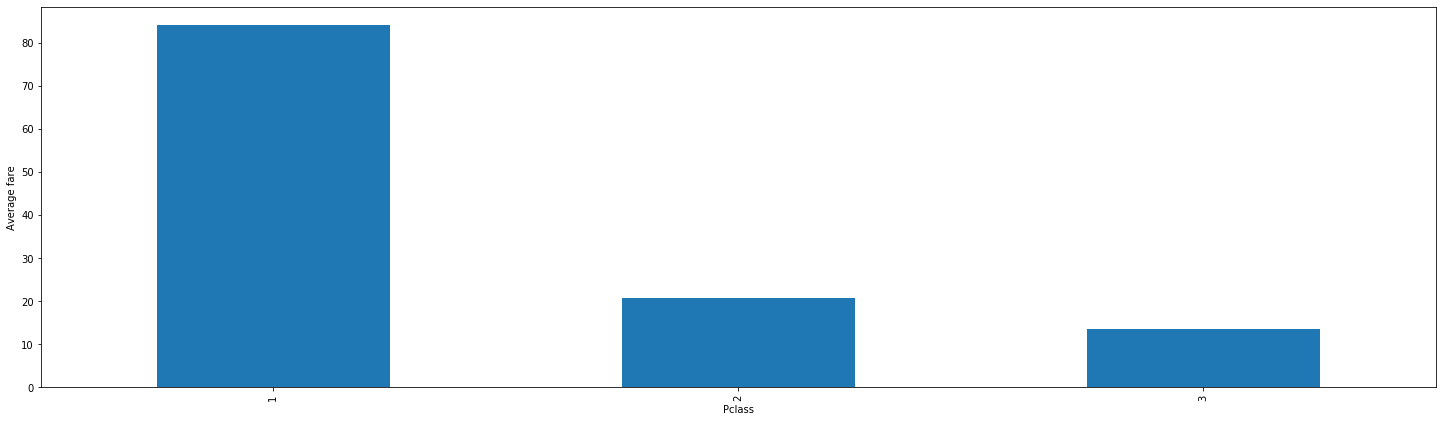

In [15]:
ax = plt.subplot()
ax.set_ylabel('Average fare')
data.groupby('Pclass').mean()['Fare'].plot(kind='bar',figsize=(25,7),ax=ax);

##### Embarkation - Survival

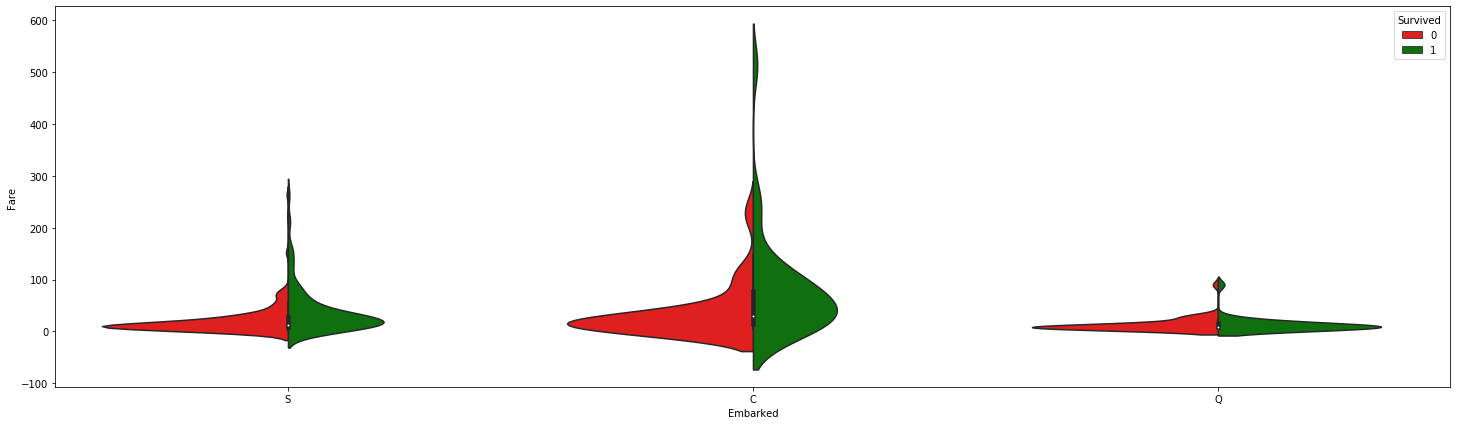

In [16]:
plt.figure(figsize=(25,7))
sns.violinplot(x='Embarked', y='Fare', hue='Survived', data=data, split=True, palette={0:'r', 1:'g'});

### 2. Feature Engineering

In [17]:
def status(feature):
    print('Processing', feature, ': Ok')

In [18]:
train = pd.read_csv('train.csv')
test  = pd.read_csv('test.csv' )
target = train.Survived
train.drop(['Survived'], 1, inplace=True)

In [19]:
def get_combined_data():
    combined = train.append(test)
    combined.reset_index(inplace=True)
    
    return combined

In [20]:
combined = get_combined_data()

In [21]:
combined.drop(['index','PassengerId'],inplace=True,axis=1)

In [22]:
combined.shape

(1309, 10)

In [23]:
combined.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


##### Extracting the passengers title

In [24]:
titles = set()
for name in data['Name']:
    titles.add(name.split(',')[1].split('.')[0].strip())

In [25]:
titles

{'Capt',
 'Col',
 'Don',
 'Dr',
 'Jonkheer',
 'Lady',
 'Major',
 'Master',
 'Miss',
 'Mlle',
 'Mme',
 'Mr',
 'Mrs',
 'Ms',
 'Rev',
 'Sir',
 'the Countess'}

In [26]:
Title_Dictionary = {
    'Capt':'Officer',
    'Col' :'Officer',
    'Don' :'Royalty',
    'Dr':'Officer',
    'Jonkheer':'Royalty',
    'Lady':'Royalty',
    'Major':'Officer',
    'Master':'Master',
    'Miss':'Miss',
    'Mlle':'Miss',
    'Mme':'Mrs',
    'Mr':'Mr',
    'Mrs':'Mrs',
    'Ms':'Mrs',
    'Rev':'Officer',
    'Sir':'Royalty',
    'the Countess':'Royalty'
}

def get_titles():
    combined['Title'] = combined['Name'].map(lambda name:name.split(',')[1].split('.')[0].strip())
    
    combined['Title'] = combined.Title.map(Title_Dictionary)
    status('Title')
    return combined

In [27]:
combined=get_titles()

Processing Title : Ok


In [28]:
combined.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


##### Processing age

In [29]:
grouped_train=combined.iloc[:891].groupby(['Sex','Pclass','Title'])
grouped_median_train=grouped_train.median()
grouped_median_train=grouped_median_train.reset_index()[['Sex','Pclass','Title','Age']]

In [30]:
grouped_median_train.head()

,Sex,Pclass,Title,Age
0,female,1,Miss,30.0
1,female,1,Mrs,40.0
2,female,1,Officer,49.0
3,female,1,Royalty,40.5
4,female,2,Miss,24.0


In [31]:
def fill_age(row):
    condition = (
    (grouped_median_train['Sex']==row['Sex']) & 
    (grouped_median_train['Title']==row['Title']) & 
    (grouped_median_train['Pclass']==row['Pclass']))
    return grouped_median_train[condition]['Age'].values[0]

def process_age():
    global combined
    
    combined['Age']=combined.apply(lambda row: fill_age(row) if np.isnan(row['Age']) else row['Age'], axis=1)
    status('age')
    return combined

In [32]:
combined = process_age()

Processing age : Ok


##### Processing Names

In [33]:
def process_names():
    global combined
    combined.drop('Name', axis=1, inplace=True)
    
    titles_dummies=pd.get_dummies(combined['Title'],prefix='Title')
    combined=pd.concat([combined, titles_dummies], axis=1)
    
    combined.drop('Title', axis=1, inplace= True)
    
    status('names')
    return combined

In [34]:
combined = process_names()

Processing names : Ok


In [35]:
combined.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty
0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1,0,0,0
1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,0,0,0,1,0,0
2,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,0,0,0,0
3,1,female,35.0,1,0,113803,53.1000,C123,S,0,0,0,1,0,0
4,3,male,35.0,0,0,373450,8.0500,NaN,S,0,0,1,0,0,0


##### Processing Fares

In [36]:
def process_fares():
    global combined
    combined.Fare.fillna(combined.iloc[:891].Fare.mean(), inplace=True)
    status('Fare')
    return combined

In [37]:
combined=process_fares()

Processing Fare : Ok


##### Processing Embarked

In [38]:
def process_embarked():
    global combined
    
    combined.Embarked.fillna('S', inplace=True)
    embarked_dummies = pd.get_dummies(combined['Embarked'],prefix='Embarked')
    combined=pd.concat([combined, embarked_dummies], axis=1)
    combined.drop('Embarked', axis=1, inplace=True)
    status('embarked')
    return combined

In [39]:
combined = process_embarked()

Processing embarked : Ok


In [40]:
combined.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty,Embarked_C,Embarked_Q,Embarked_S
0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,0,0,1,0,0,0,0,0,1
1,1,female,38.0,1,0,PC 17599,71.2833,C85,0,0,0,1,0,0,1,0,0
2,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1,0,0,0,0,0,0,1
3,1,female,35.0,1,0,113803,53.1000,C123,0,0,0,1,0,0,0,0,1
4,3,male,35.0,0,0,373450,8.0500,NaN,0,0,1,0,0,0,0,0,1


##### Processing Cabin

In [41]:
train_cabin=set()
test_cabin=set()

for c in combined.iloc[:891]['Cabin']:
    try:
        train_cabin.add(c[0])
    except:
        train_cabin.add('U')

for c in combined.iloc[891:]['Cabin']:
    try:
        test_cabin.add(c[0])
    except:
        test_cabin.add('U')

In [42]:
train_cabin

{'A', 'B', 'C', 'D', 'E', 'F', 'G', 'T', 'U'}

In [43]:
test_cabin

{'A', 'B', 'C', 'D', 'E', 'F', 'G', 'U'}

In [44]:
def process_cabin():
    global combined
    
    combined.Cabin.fillna('U',inplace=True)
    combined['Cabin']=combined['Cabin'].map(lambda c: c[0])
    
    cabin_dummies = pd.get_dummies(combined['Cabin'],prefix='Cabin')
    combined = pd.concat([combined, cabin_dummies], axis=1)
    
    combined.drop('Cabin', axis=1, inplace=True)
    status('cabin')
    return combined

In [45]:
combined = process_cabin()

Processing cabin : Ok


In [46]:
combined.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Title_Master,Title_Miss,Title_Mr,...,Embarked_S,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U
0,3,male,22.0,1,0,A/5 21171,7.2500,0,0,1,...,1,0,0,0,0,0,0,0,0,1
1,1,female,38.0,1,0,PC 17599,71.2833,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,3,female,26.0,0,0,STON/O2. 3101282,7.9250,0,1,0,...,1,0,0,0,0,0,0,0,0,1
3,1,female,35.0,1,0,113803,53.1000,0,0,0,...,1,0,0,1,0,0,0,0,0,0
4,3,male,35.0,0,0,373450,8.0500,0,0,1,...,1,0,0,0,0,0,0,0,0,1


##### Processing Sex

In [47]:
def process_sex():
    global combined
    
    combined['Sex']=combined['Sex'].map({'male':1, 'female':0})
    status('Sex')
    
    return combined

In [48]:
combined = process_sex()

Processing Sex : Ok


##### Processing Pclass

In [49]:
def process_pclass():
    global combined
    
    pclass_dummies = pd.get_dummies(combined['Pclass'], prefix='Pclass')
    combined = pd.concat([combined, pclass_dummies], axis=1)
    combined.drop('Pclass', axis=1, inplace=True)
    
    status('Pclass')
    return combined

In [50]:
combined = process_pclass()

Processing Pclass : Ok


##### Processing Ticket

In [51]:
def cleanTicket(ticket):
    ticket = ticket.replace('.','')
    ticket = ticket.replace('/','')
    ticket = ticket.split()
    ticket = map(lambda t : t.strip(), ticket)
    ticket = list(filter(lambda t : not t.isdigit(), ticket))
    if len(ticket) > 0:
        return ticket[0]
    else:
        return 'XXX'

In [52]:
tickets = set()
for t in combined['Ticket']:
    tickets.add(cleanTicket(t))

In [53]:
print(len(tickets))

37


In [54]:
def process_ticket():
    global combined
    
    def cleanTicket(ticket):
        ticket = ticket.replace('.','')
        ticket = ticket.replace('/','')
        ticket = ticket.split()
        ticket = map(lambda t : t.strip(), ticket)
        ticket = list(filter(lambda t : not t.isdigit(), ticket))
        if len(ticket) > 0:
            return ticket[0]
        else:
            return 'XXX'
    
    combined['Ticket']=combined['Ticket'].map(cleanTicket)
    tickets_dummies = pd.get_dummies(combined['Ticket'], prefix='Ticket')
    combined = pd.concat([combined, tickets_dummies], axis=1)
    combined.drop('Ticket', inplace=True, axis=1)
    
    status('Ticket')
    return combined
    

In [55]:
combined = process_ticket()

Processing Ticket : Ok


##### Processing Family

In [56]:
def process_family():
    global combined
    
    combined['FamilySize']=combined['Parch']+combined['SibSp'] + 1
    
    combined['Singleton'] = combined['FamilySize'].map(lambda s:1 if s == 1 else 0)
    combined['SmallFamily'] = combined['FamilySize'].map(lambda s:1 if 2 <= s <= 4 else 0)
    combined['LargeFamily'] = combined['FamilySize'].map(lambda s:1 if 5 <= s else 0)
    status('Family')
    return combined

In [57]:
combined = process_family()

Processing Family : Ok


In [58]:
combined.shape

(1309, 67)

In [59]:
combined.head()

,Sex,Age,SibSp,Parch,Fare,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,...,Ticket_STONO2,Ticket_STONOQ,Ticket_SWPP,Ticket_WC,Ticket_WEP,Ticket_XXX,FamilySize,Singleton,SmallFamily,LargeFamily
0,1,22.0,1,0,7.2500,0,0,1,0,0,...,0,0,0,0,0,0,2,0,1,0
1,0,38.0,1,0,71.2833,0,0,0,1,0,...,0,0,0,0,0,0,2,0,1,0
2,0,26.0,0,0,7.9250,0,1,0,0,0,...,1,0,0,0,0,0,1,1,0,0
3,0,35.0,1,0,53.1000,0,0,0,1,0,...,0,0,0,0,0,1,2,0,1,0
4,1,35.0,0,0,8.0500,0,0,1,0,0,...,0,0,0,0,0,1,1,1,0,0


### 3. Modeling

In [60]:
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble.gradient_boosting import GradientBoostingClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

In [61]:
def compute_score(clf, X, y, scoring='accuracy'):
    xval = cross_val_score(clf, X, y, cv = 5, scoring=scoring)
    return np.mean(xval)

In [62]:
def recover_train_test_target():
    global combined
    
    targets = pd.read_csv('train.csv', 
                          usecols=['Survived'])['Survived'].values
    train = combined.iloc[:891]
    test = combined.iloc[891:]
    
    return train, test, targets

In [63]:
train, test, targets = recover_train_test_target()

### Feature Selection

In [64]:
clf = RandomForestClassifier(n_estimators=50, max_features='sqrt')
clf = clf.fit(train, targets)

In [65]:
features = pd.DataFrame()
features['feature'] = train.columns
features['importance'] = clf.feature_importances_
features.sort_values(by=['importance'], ascending=True, 
                     inplace=True)
features.set_index('feature', inplace=True)

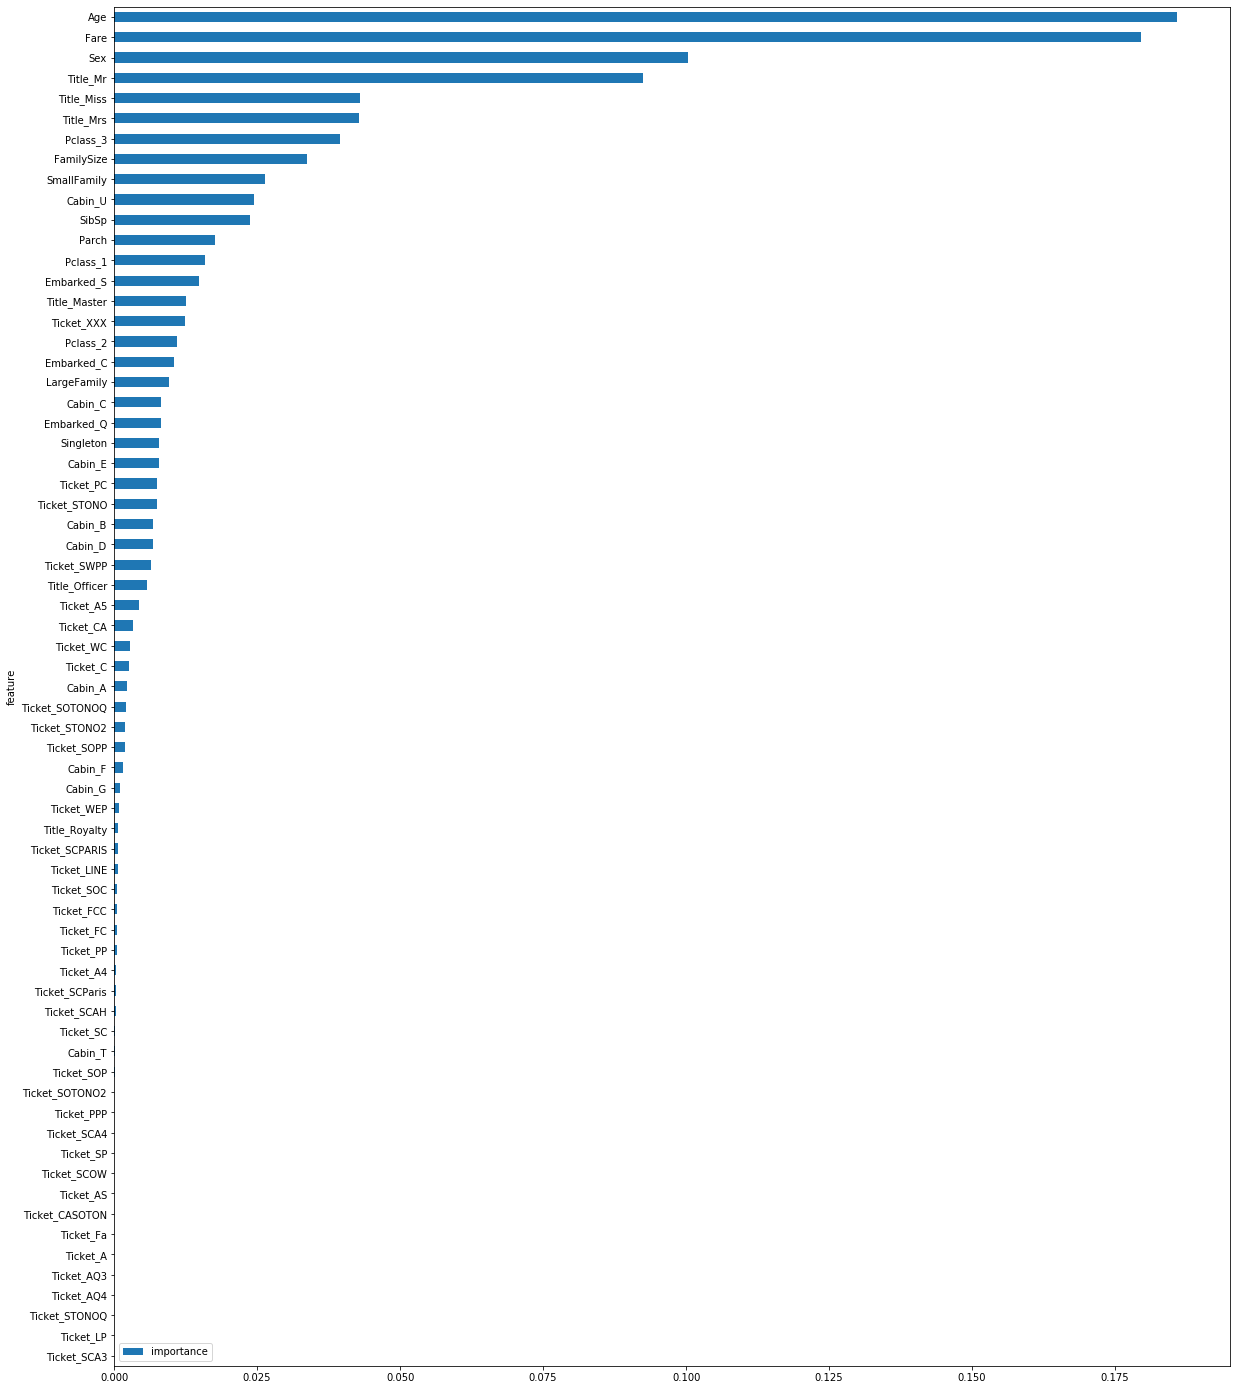

In [66]:
features.plot(kind='barh', figsize=(20, 25));

In [67]:
model = SelectFromModel(clf, prefit=True)
train_reduced = model.transform(train)
train_reduced.shape

(891, 13)

In [68]:
test_reduced = model.transform(test)
test_reduced.shape

(418, 13)

##### Trying different base models

In [69]:
logreg = LogisticRegression()
logreg_cv = LogisticRegressionCV()
rf = RandomForestClassifier()
gboost = GradientBoostingClassifier()

models = [logreg, logreg_cv, rf, gboost]

In [70]:
for model in models:
    print ('Cross-validation of : {0}'.format(model.__class__))
    score = compute_score(clf=model, X=train_reduced, y=targets, scoring='accuracy')
    print ('CV score = {0}'.format(score))
    print ('****')

Cross-validation of : <class 'sklearn.linear_model.logistic.LogisticRegression'>
CV score = 0.8125832554019151
****
Cross-validation of : <class 'sklearn.linear_model.logistic.LogisticRegressionCV'>
CV score = 0.8215658842316813
****
Cross-validation of : <class 'sklearn.ensemble.forest.RandomForestClassifier'>
CV score = 0.8137510031786089
****
Cross-validation of : <class 'sklearn.ensemble.gradient_boosting.GradientBoostingClassifier'>
CV score = 0.8249176976842577
****


### Hyperparameters tuning

In [71]:
run_gs = False

if run_gs:
    parameter_grid = {
                 'max_depth' : [4, 6, 8],
                 'n_estimators': [50, 10],
                 'max_features': ['sqrt', 'auto', 'log2'],
                 'min_samples_split': [2, 3, 10],
                 'min_samples_leaf': [1, 3, 10],
                 'bootstrap': [True, False],
                 }
    forest = RandomForestClassifier()
    cross_validation = StratifiedKFold(n_splits=5)

    grid_search = GridSearchCV(forest,
                               scoring='accuracy',
                               param_grid=parameter_grid,
                               cv=cross_validation,
                               verbose=1
                              )

    grid_search.fit(train, targets)
    model = grid_search
    parameters = grid_search.best_params_

    print('Best score: {}'.format(grid_search.best_score_))
    print('Best parameters: {}'.format(grid_search.best_params_))
    
else: 
    parameters = {'bootstrap': False, 'min_samples_leaf': 3, 'n_estimators': 50, 
                  'min_samples_split': 10, 'max_features': 'sqrt', 'max_depth': 6}
    
    model = RandomForestClassifier(**parameters)
    model.fit(train, targets)

In [72]:
output = model.predict(test).astype(int)
df_output = pd.DataFrame()
aux = pd.read_csv('test.csv')
df_output['PassengerId'] = aux['PassengerId']
df_output['Survived'] = output
df_output[['PassengerId','Survived']].to_csv('submission.csv', index=False)